# A Project on K-Means Clustering for Customer Segmentation.

### Table of contents

- Introdution
- Setting up K-Means
- Creating the Visual Plot
Customer Segmentation with K-Means
Pre-processing
Modeling
Insights


## Introduction

There are many models for **clustering** out there. In this project, I will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if we need to quickly discover insights from **unlabeled data**.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

In this project, I have represented the algorithms for how to use k-Means for **customer segmentation** using **k-means**.



**Required Libraries**

In [1]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Importing Dataset

We have the following customer dataset, and we need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations.

In [45]:
data= pd.read_csv('C:/Users/hp/Downloads/Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Data Cleaning

Dropping address and Customer id

In [46]:
df= data.drop(['Customer Id','Address'], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


#### Dealing with null values

In [47]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [48]:
df=df.dropna()
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [49]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


We can have a look into the statistical summary of variables present in the dataset.

In [50]:
df.shape

(700, 8)

**Transforming the data to scale and compute smoothly**.

In [51]:
from sklearn.preprocessing import StandardScaler
x= df.values[:,0:]
#x= np.nan_to_num(x)
t_df = StandardScaler().fit_transform(x)     #transformed Data

In [52]:
t_df[0:5]

array([[ 0.76830405,  0.29879269, -0.35900652, -0.72310225, -0.67569934,
        -0.60428433, -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891,  1.47870741,  1.43142147,
         1.5706204 , -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057,  0.30984549,  2.15411948,
         0.83520125,  1.68081427,  1.55949495],
       [-0.73326739,  0.29879269, -0.65961006, -0.72310225, -0.41242741,
        -0.77383254, -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  3.39853777,  5.6376812 ,  3.66521532,
         1.78065319, -0.59494973, -0.44860921]])

Above is the transformed data and is now ready for modeling.

### Modeling k-means clustering

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

In [53]:
k=3
kmeans= KMeans(init='k-means++', n_clusters= k, n_init=10)
kmeans.fit(x)
labels=kmeans.labels_


In [54]:
df['clus']= labels    # adding labels to the dataset

In [55]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2


We can easily check the centroid values by averaging the variables in each cluster.

In [56]:
df.groupby('clus').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus,,,,,,,,
0,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


Now, lets look at the distribution of customers based on their age and income:

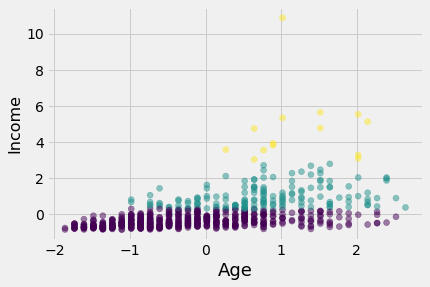

In [57]:
plt.scatter(t_df[:, 0], t_df[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

The three segments has been  categorized on basis of their income as low, middle, and high. 

3D visualization along with 'education' feature.

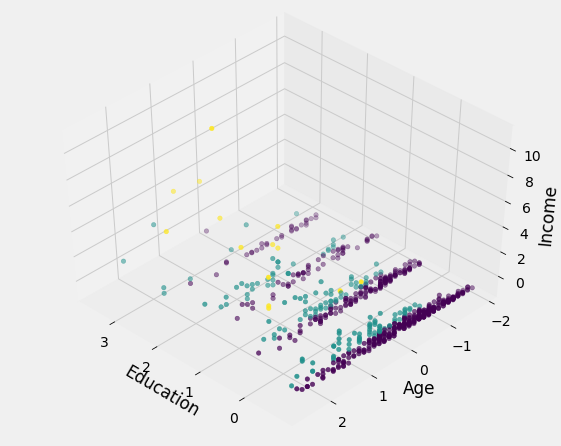

In [58]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(t_df[:, 1], t_df[:, 0], t_df[:, 3], c= labels.astype(np.float))

### Evaluation
As we applied KMeans clustering algorithm to the scaled data **t-df**, we shall now evaluate the performance of the clusterig model. Generally, we have following two methods to evaluate the performance :

1. Elbow Method
2. Silhouette Coefficient

#### 1. Elbow Method

To perform the elbow method, we run several k-means, increment k with each iteration, and record the SSE (Sum of Squarred Errors). 

In [59]:
sse=[]
for k in range(1,11):
    km=KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(t_df)
    sse.append(km.inertia_)
    

Plotting **Number of clusters** vs **SSE**

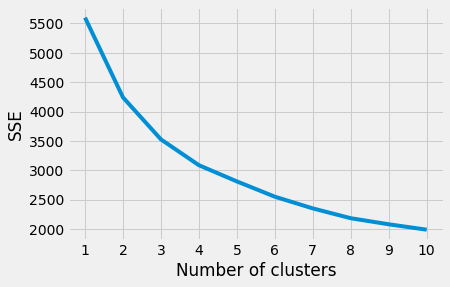

In [60]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Here, we have elbow at cluster **2** and **4**. To choose the optimal one out of both, we will try to evaluate from **silhouette criteria**.


#### 2. Silhouette Coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [61]:
sil_coef= []
for k in range(2,11):
    km2=KMeans(init= 'k-means++', n_clusters=k, n_init=12)
    km2.fit(t_df)
    score= silhouette_score(t_df, km2.labels_)
    sil_coef.append(score)
    
print(sil_coef)

[0.3349664336570762, 0.27163714546797385, 0.2483377629854806, 0.24807676655790256, 0.23818385995817667, 0.21682077235665978, 0.23674574950585534, 0.21346389159149218, 0.19790793513555352]


Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

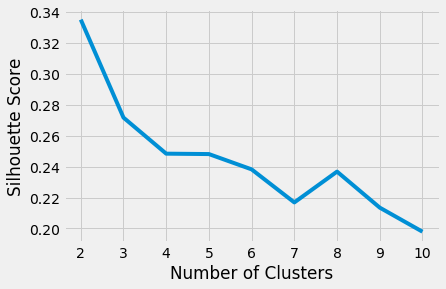

In [62]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),sil_coef)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here also, we find 2 to be the optmal number of clusters as it has the highest score. Further we fit the final model with number of clusters 2.

### Optimal Clustering: 2-Means cluster 

In [63]:
kmeans1= KMeans(n_clusters=2)
kmeans1.fit(t_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
kmeans1.inertia_    # optimal SSE

4240.41655339373

In [65]:
labels=kmeans1.labels_    # Optimal Labels

In [66]:
kmeans1.cluster_centers_     # optimal Centroids

array([[-0.25726091, -0.07386546, -0.31427715, -0.34063323, -0.32414822,
        -0.37563842, -0.02706038, -0.19360326],
       [ 0.8753343 ,  0.25132838,  1.06933296,  1.15900991,  1.1029194 ,
         1.27811562,  0.09207336,  0.65873813]])

Let's explore the model through visuals from **Age** , **income** and **education**.

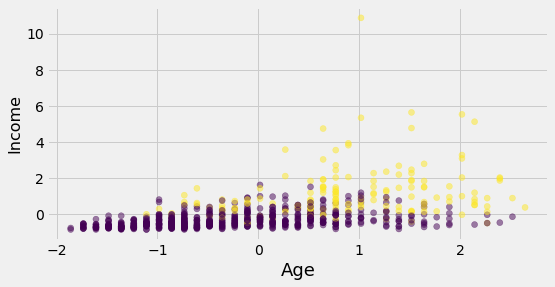

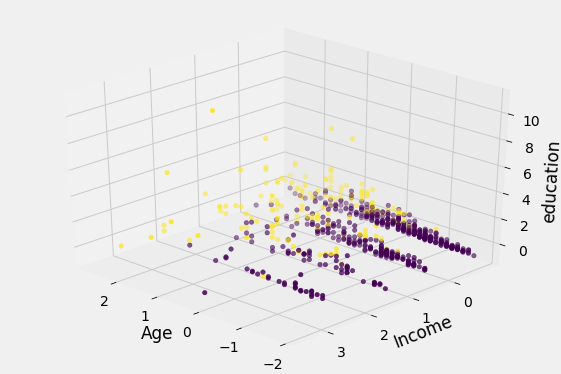

In [67]:
fig = plt.figure(figsize=(8,4))

plt.scatter(t_df[:, 0], t_df[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

fig = plt.figure(figsize=(8,5))
plt.subplot(2,1,2)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)
plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('education')
ax.scatter(t_df[:, 0], t_df[:, 1], t_df[:, 3], c= labels.astype(np.float))

### Conclusion

Finally, after evaluating by Elbow and Silcouette Coefficent, we interpret that optimal number of clusters to be used here, is 2. We can further analyse this dataset as per business requirements considering this cluster modeling in account.


Thanks,

**Arun Virha**